<a href="https://colab.research.google.com/github/PPancham/PhD/blob/main/Random_state_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Biomarker_16032025_without_SWD_with_GNV.xlsx to Biomarker_16032025_without_SWD_with_GNV (3).xlsx

 --- Data has outliers and was not filtered ---
Data shape after outlier removal: (389, 10)
Data saved to 'after_outlier.xlsx'

--- Multiple Train-Test Split Evaluation ---

Data Split Random State 1/42


<ipython-input-4-89dd717e677b>:281: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{


Data Split Random State 1 model_Random_State: 1 Test Accuracy: 0.7607
Test Weighted F1-score: 0.7468
Data Split Random State 1 model_Random_State: 5 Test Accuracy: 0.7778
Test Weighted F1-score: 0.7704
Data Split Random State 1 model_Random_State: 10 Test Accuracy: 0.7607
Test Weighted F1-score: 0.7478
Data Split Random State 1 model_Random_State: 15 Test Accuracy: 0.7863
Test Weighted F1-score: 0.7789
Data Split Random State 1 model_Random_State: 20 Test Accuracy: 0.7692
Test Weighted F1-score: 0.7554
Data Split Random State 1 model_Random_State: 25 Test Accuracy: 0.7778
Test Weighted F1-score: 0.7689
Data Split Random State 1 model_Random_State: 30 Test Accuracy: 0.7607
Test Weighted F1-score: 0.7507
Data Split Random State 1 model_Random_State: 35 Test Accuracy: 0.7692
Test Weighted F1-score: 0.7596
Data Split Random State 1 model_Random_State: 40 Test Accuracy: 0.8034
Test Weighted F1-score: 0.7921
Best model for data split 1: model_Random_State=16, accuracy=0.8205

Data Split Rand

<ipython-input-4-89dd717e677b>:194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])


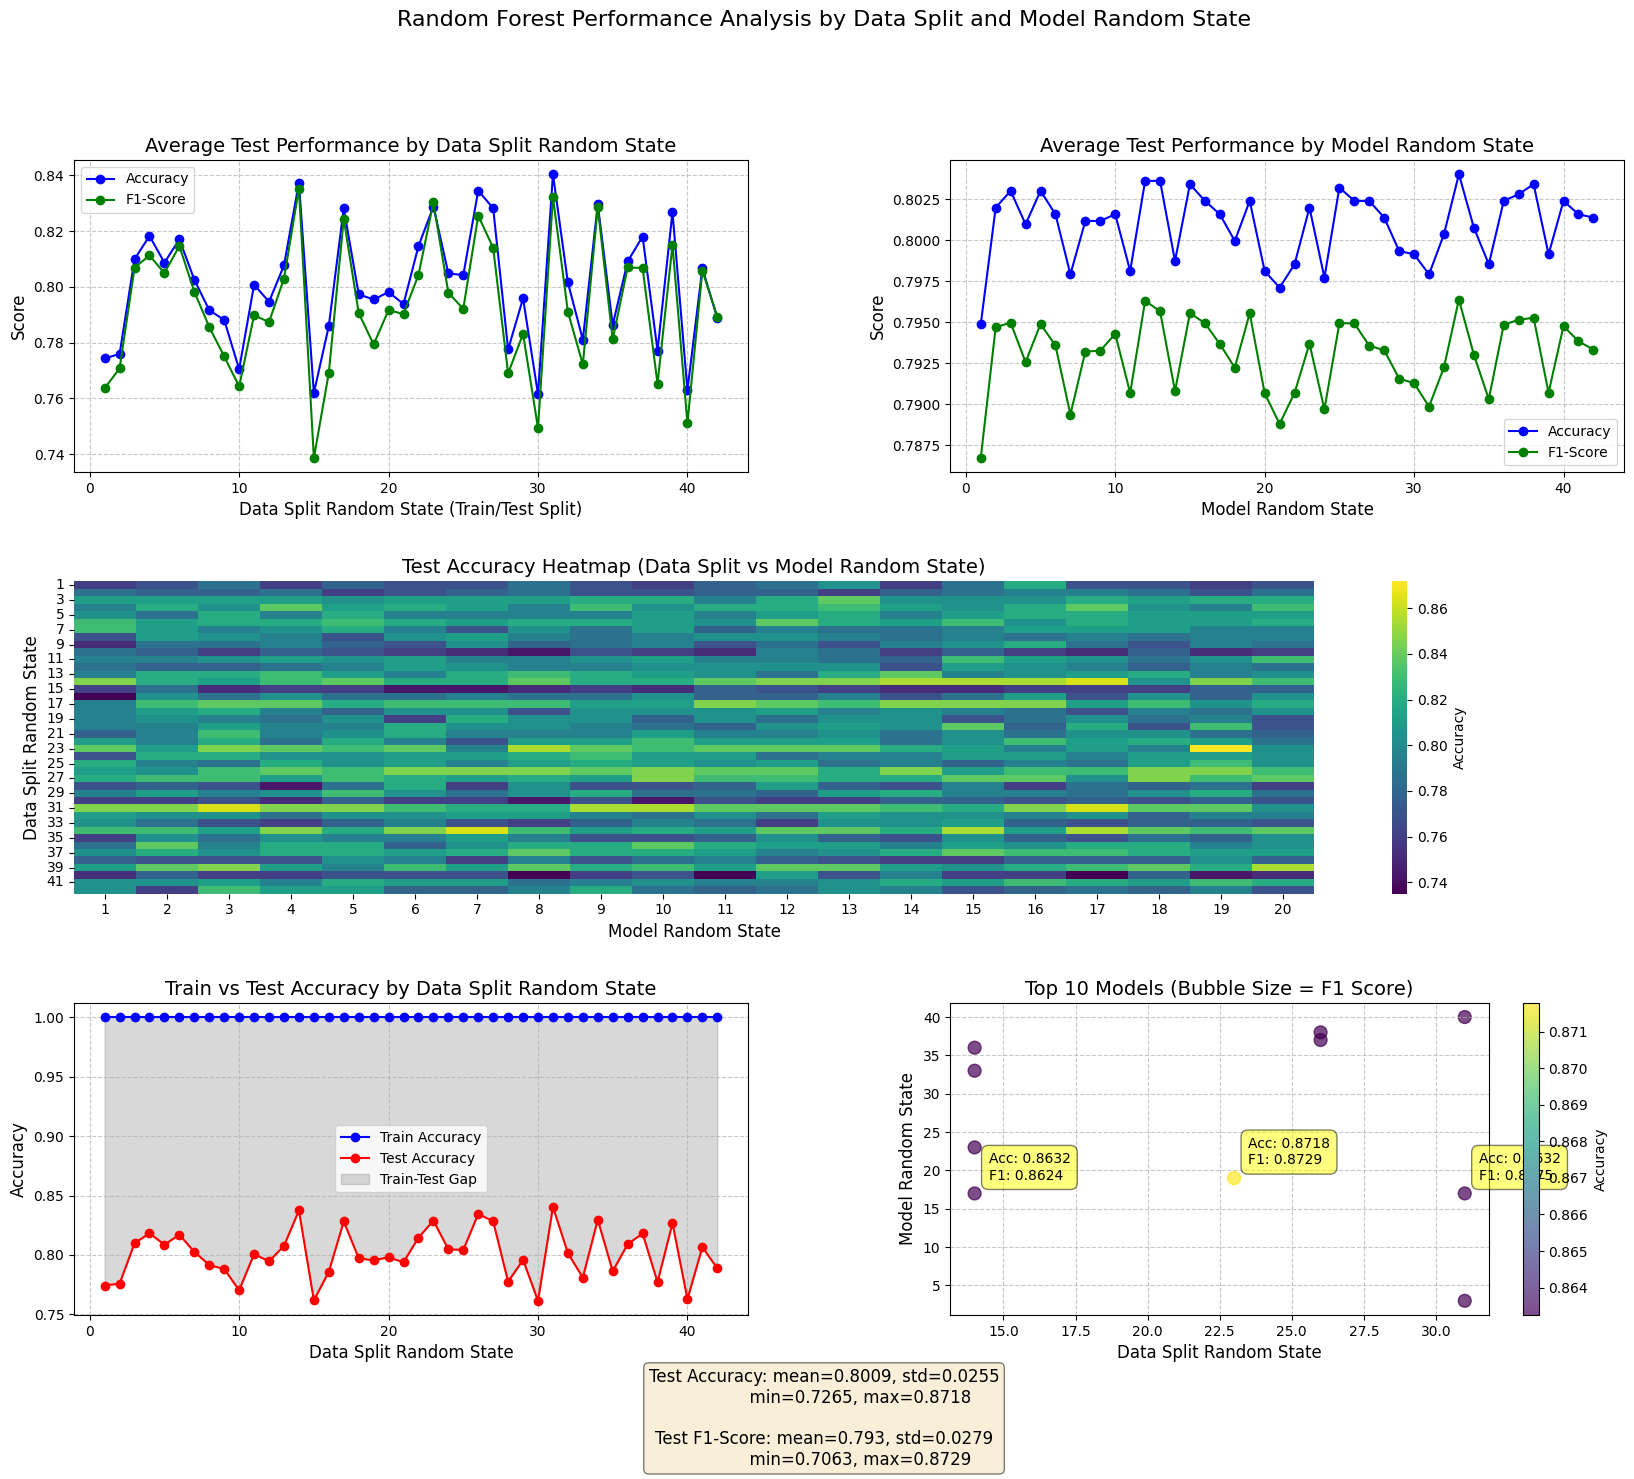


Classification Report (Best Model):
                    precision    recall  f1-score   support

                AD       0.71      0.80      0.75        15
Cognitive Negative       0.95      0.85      0.90        41
Cognitive Positive       0.89      0.94      0.91        34
               MCI       0.85      0.85      0.85        27

          accuracy                           0.87       117
         macro avg       0.85      0.86      0.85       117
      weighted avg       0.88      0.87      0.87       117


Confusion Matrix (Best Model):
[[12  1  0  2]
 [ 1 35  3  2]
 [ 1  1 32  0]
 [ 3  0  1 23]]

Feature Importance (Best Model):
        Feature  Importance
4   IgA Average    0.203636
6   IgM Average    0.195386
2  IgG3 Average    0.168530
3  IgG4 Average    0.127142
5   IgE Average    0.125961
1  IgG2 Average    0.089772
0  IgG1 Average    0.089572


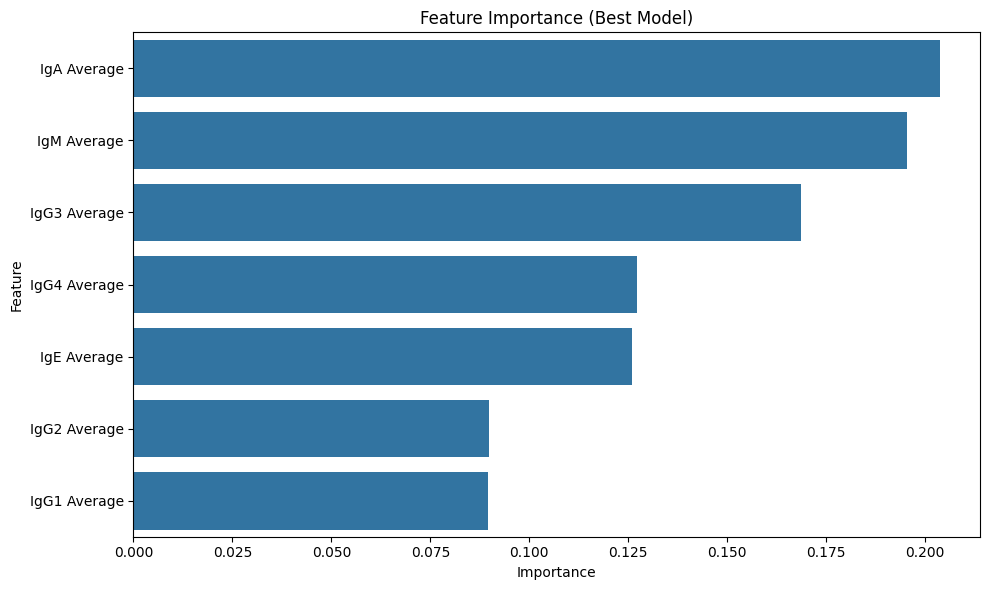

Cross-validation scores: [0.64102564 0.67948718 0.70512821 0.82051282 0.67532468]
Mean CV accuracy: 0.7043
Data saved to 'Best_Trained_Model_Pumpkin2025-03-21.pkl'

Analysis complete!


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import datetime
import google.colab.files as files

# Track all metrics with their parameters
results_df = pd.DataFrame(columns=['data_split_random_state', 'model_Random_State', 'Accuracy', 'F1_Score','Is_Train', 'Is_Test'])


uploadedSpreadsheet = files.upload()
fileName = list(uploadedSpreadsheet.keys())[0]
data = pd.read_excel(fileName)
columns_to_process = ['IgG1 Average', 'IgG2 Average', 'IgG3 Average', 'IgG4 Average', 'IgA Average','IgE Average','IgM Average']

def OutlierRemoval(data, columns, filter_data):
    if filter_data == False:
        print("\n --- Data has outliers and was not filtered ---")
        return data
    else:
        data_filtered = data.copy()
        for column in columns:
            Q1 = data_filtered[column].quantile(0.25)
            Q3 = data_filtered[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data_filtered = data_filtered[(data_filtered[column] >= lower_bound) &
                                        (data_filtered[column] <= upper_bound)]

        print("\n --- Data does not have outliers and was filtered ---")
        return data_filtered


def SaveData(Pumpkin, prefix=""):
    filename = f"{prefix}Trained_Model_Pumpkin{datetime.date.today()}.pkl"
    joblib.dump(Pumpkin, filename)
    return f"Data saved to '{filename}'"

def plot_rf_performance(results_df):
    """
    Create visualizations for Random Forest performance across iterations and random states.
    """
    # Set up the figure with subplots
    fig = plt.figure(figsize=(20, 15))
    grid = plt.GridSpec(3, 2, hspace=0.35, wspace=0.3)

    # 1. Performance by Iteration (top left)
    ax1 = fig.add_subplot(grid[0, 0])

    # Get test data only
    test_data = results_df[results_df['Is_Test'] == True]

    # Group by iteration and calculate mean metrics
    by_iteration = test_data.groupby('data_split_random_state').agg({
        'Accuracy': 'mean',
        'F1_Score': 'mean'
    }).reset_index()

    # Plot iteration performance
    ax1.plot(by_iteration['data_split_random_state'], by_iteration['Accuracy'], 'o-', color='blue', label='Accuracy')
    ax1.plot(by_iteration['data_split_random_state'], by_iteration['F1_Score'], 'o-', color='green', label='F1-Score')

    ax1.set_title('Average Test Performance by Data Split Random State', fontsize=14)
    ax1.set_xlabel('Data Split Random State (Train/Test Split)', fontsize=12)
    ax1.set_ylabel('Score', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()

    # 2. Performance by Random State (top right)
    ax2 = fig.add_subplot(grid[0, 1])

    # Group by random state and calculate mean metrics
    by_random_state = test_data.groupby('model_Random_State').agg({
        'Accuracy': 'mean',
        'F1_Score': 'mean'
    }).reset_index()

    # Plot random state performance
    ax2.plot(by_random_state['model_Random_State'], by_random_state['Accuracy'], 'o-', color='blue', label='Accuracy')
    ax2.plot(by_random_state['model_Random_State'], by_random_state['F1_Score'], 'o-', color='green', label='F1-Score')

    ax2.set_title('Average Test Performance by Model Random State', fontsize=14)
    ax2.set_xlabel('Model Random State', fontsize=12)
    ax2.set_ylabel('Score', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()

    # 3. Heatmap of Accuracy by Iteration and Random State (middle)
    ax3 = fig.add_subplot(grid[1, :])

    # Create a pivot table for the heatmap
    # Limit to first 20 random states for clarity if there are many
    heatmap_data = test_data[test_data['model_Random_State'] <= 20].pivot_table(
        index='data_split_random_state',
        columns='model_Random_State',
        values='Accuracy'
    )

    # Plot heatmap
    sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt='.3f',
                cbar_kws={'label': 'Accuracy'}, ax=ax3)

    ax3.set_title('Test Accuracy Heatmap (Data Split vs Model Random State)', fontsize=14)
    ax3.set_xlabel('Model Random State', fontsize=12)
    ax3.set_ylabel('Data Split Random State', fontsize=12)

    # 4. Train vs Test Performance (bottom left)
    ax4 = fig.add_subplot(grid[2, 0])

    # Prepare data for train vs test comparison
    train_data = results_df[results_df['Is_Train'] == True]
    train_mean = train_data.groupby('data_split_random_state')['Accuracy'].mean().reset_index()
    test_mean = test_data.groupby('data_split_random_state')['Accuracy'].mean().reset_index()

    # Calculate train-test gap
    merged_data = pd.merge(train_mean, test_mean, on='data_split_random_state', suffixes=('_train', '_test'))
    merged_data['gap'] = merged_data['Accuracy_train'] - merged_data['Accuracy_test']

    # Plot train vs test
    ax4.plot(merged_data['data_split_random_state'], merged_data['Accuracy_train'], 'o-', color='blue', label='Train Accuracy')
    ax4.plot(merged_data['data_split_random_state'], merged_data['Accuracy_test'], 'o-', color='red', label='Test Accuracy')

    # Add gap as a shaded region
    ax4.fill_between(merged_data['data_split_random_state'],
                   merged_data['Accuracy_test'],
                   merged_data['Accuracy_train'],
                   alpha=0.3, color='gray', label='Train-Test Gap')

    ax4.set_title('Train vs Test Accuracy by Data Split Random State', fontsize=14)
    ax4.set_xlabel('Data Split Random State', fontsize=12)
    ax4.set_ylabel('Accuracy', fontsize=12)
    ax4.grid(True, linestyle='--', alpha=0.7)
    ax4.legend()

    # 5. Best Models (bottom right)
    ax5 = fig.add_subplot(grid[2, 1])

    # Get top 10 models by test accuracy
    top_models = test_data.sort_values('Accuracy', ascending=False).head(10)

    # Create a scatter plot of the best models
    scatter = ax5.scatter(
        top_models['data_split_random_state'],
        top_models['model_Random_State'],
        c=top_models['Accuracy'],
        s=top_models['F1_Score']*100,  # Size based on F1 score
        cmap='viridis',
        alpha=0.7
    )

    # Add colorbar and legend
    cbar = plt.colorbar(scatter, ax=ax5)
    cbar.set_label('Accuracy')

    # Add annotations for the top 3 models
    for i in range(min(3, len(top_models))):
        row = top_models.iloc[i]
        ax5.annotate(
            f"Acc: {row['Accuracy']:.4f}\nF1: {row['F1_Score']:.4f}",
            (row['data_split_random_state'], row['model_Random_State']),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
        )

    ax5.set_title('Top 10 Models (Bubble Size = F1 Score)', fontsize=14)
    ax5.set_xlabel('Data Split Random State', fontsize=12)
    ax5.set_ylabel('Model Random State', fontsize=12)
    ax5.grid(True, linestyle='--', alpha=0.7)

    # Add overall summary statistics as text
    test_stats = test_data.agg({
        'Accuracy': ['mean', 'std', 'min', 'max'],
        'F1_Score': ['mean', 'std', 'min', 'max']
    }).round(4)

    stats_text = (
        f"Test Accuracy: mean={test_stats['Accuracy']['mean']}, std={test_stats['Accuracy']['std']}\n"
        f"              min={test_stats['Accuracy']['min']}, max={test_stats['Accuracy']['max']}\n\n"
        f"Test F1-Score: mean={test_stats['F1_Score']['mean']}, std={test_stats['F1_Score']['std']}\n"
        f"              min={test_stats['F1_Score']['min']}, max={test_stats['F1_Score']['max']}"
    )

    plt.figtext(0.5, 0.01, stats_text, ha='center', fontsize=12,
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Adjust layout and add main title
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.suptitle('Random Forest Performance Analysis by Data Split and Model Random State', fontsize=16)

    # Save the figure
    plt.savefig('rf_performance_analysis.png', dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()

    return fig



# Remove outliers
filter_data = False  # Set to True if you want to remove outliers
data = OutlierRemoval(data, columns_to_process, filter_data)
print("Data shape after outlier removal:", data.shape)

# Save to Excel file
output_file = "after_outlier.xlsx"
data.to_excel(output_file, index=False)
print(f"Data saved to '{output_file}'")

# Data Input for Model
feature_names = data[columns_to_process]
Group = data['Group']

# Perform multiple train/test splits and evaluate model on each
train_indexes = []
test_indexes = []
accuracies = []
f1_scores = []
models = []
best_models_per_iteration = []

print("\n--- Multiple Train-Test Split Evaluation ---")
num_iterations = 42    # Reduced for demonstration, use 100 for full analysis
num_random_states = 42  # Reduced for demonstration, use 99 for full analysis

# Global results tracking
results_df = pd.DataFrame(columns=[
    'data_split_random_state', 'model_Random_State', 'Accuracy', 'F1_Score',
    'Is_Train', 'Is_Test'
])

for i in range(1, num_iterations + 1):
    print(f"\nData Split Random State {i}/{num_iterations}")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        feature_names, Group, test_size=0.3, shuffle=True, random_state=i, stratify=Group
    )

    # Store indexes for potential later use
    train_indexes.append(X_train.index)
    test_indexes.append(X_test.index)

    # Track best model for this iteration
    best_acc_for_iteration = 0
    best_model_for_iteration = None
    best_random_state_for_iteration = None

    for p in range(1, num_random_states + 1):
        # Train Random Forest model
        Pumpkin = RandomForestClassifier(n_estimators=100, random_state=p, bootstrap=True)
        Pumpkin.fit(X_train, y_train)
        models.append(Pumpkin)

        # Test set predictions and metrics
        y_test_pred = Pumpkin.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_report = classification_report(y_test, y_test_pred, output_dict=True)
        test_f1 = test_report['weighted avg']['f1-score']

        # Training set predictions and metrics
        y_train_pred = Pumpkin.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_report = classification_report(y_train, y_train_pred, output_dict=True)
        train_f1 = train_report['weighted avg']['f1-score']

        # Track if this is the best model for this iteration
        if test_accuracy > best_acc_for_iteration:
            best_acc_for_iteration = test_accuracy
            best_model_for_iteration = Pumpkin
            best_random_state_for_iteration = p

        # Add test results to the DataFrame
        results_df = pd.concat([results_df, pd.DataFrame([{
            'data_split_random_state': i,
            'model_Random_State': p,
            'Accuracy': test_accuracy,
            'F1_Score': test_f1,
            'Is_Train': False,
            'Is_Test': True
        }])], ignore_index=True)

        # Add train results to the DataFrame
        results_df = pd.concat([results_df, pd.DataFrame([{
            'data_split_random_state': i,
            'model_Random_State': p,
            'Accuracy': train_accuracy,
            'F1_Score': train_f1,
            'Is_Train': True,
            'Is_Test': False
        }])], ignore_index=True)

        # Print every 5th model to reduce output
        if p % 5 == 0 or p == 1:
            print(f'Data Split Random State {i} model_Random_State: {p} Test Accuracy: {test_accuracy:.4f}')
            print(f"Test Weighted F1-score: {test_f1:.4f}")

    # Save the best model for this iteration
    best_models_per_iteration.append((i, best_random_state_for_iteration, best_acc_for_iteration, best_model_for_iteration))
    print(f"Best model for data split {i}: model_Random_State={best_random_state_for_iteration}, accuracy={best_acc_for_iteration:.4f}")

# Print overall performance statistics
print("\n--- Overall Performance Statistics ---")
test_only = results_df[results_df['Is_Test'] == True]
print(f"Mean Test Accuracy: {test_only['Accuracy'].mean():.4f}")
print(f"Standard Deviation: {test_only['Accuracy'].std():.4f}")
print(f"Min Accuracy: {test_only['Accuracy'].min():.4f}")
print(f"Max Accuracy: {test_only['Accuracy'].max():.4f}")

# Find overall best model
best_result = results_df[results_df['Is_Test'] == True].sort_values('Accuracy', ascending=False).iloc[0]
print(f"\nBest model overall: Data Split Random State {best_result['data_split_random_state']}, Model Random State {best_result['model_Random_State']}")
print(f"Accuracy: {best_result['Accuracy']:.4f}, F1-Score: {best_result['F1_Score']:.4f}")

# Plot the results
print("\nCreating performance visualization...")
plot_rf_performance(results_df)

# Select best model details
best_data_split = int(best_result['data_split_random_state'])
best_model_random_state = int(best_result['model_Random_State'])

# Find the best model's index
best_iter_idx = best_data_split - 1  # Convert to 0-based index
best_model_idx = (best_iter_idx * num_random_states) + (best_model_random_state - 1)
best_model = models[best_model_idx]

# Evaluate the best model more thoroughly
best_X_train_idx = train_indexes[best_iter_idx]
best_X_test_idx = test_indexes[best_iter_idx]
X_test_best = feature_names.loc[best_X_test_idx]
y_test_best = Group.loc[best_X_test_idx]
y_pred_best = best_model.predict(X_test_best)

# Print detailed classification report for the best model
print("\nClassification Report (Best Model):")
print(classification_report(y_test_best, y_pred_best))

# Print confusion matrix for the best model
print("\nConfusion Matrix (Best Model):")
print(confusion_matrix(y_test_best, y_pred_best))

# Feature importance for the best model
feature_importance = pd.DataFrame({
    'Feature': columns_to_process,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Best Model):")
print(feature_importance)

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Best Model)')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

# Implement k-fold cross-validation on best model
cv_scores = cross_val_score(best_model, feature_names, Group, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")

# Save the best model
save_result = SaveData(best_model, prefix="Best_")
print(save_result)

print("\nAnalysis complete!")

Saving Biomarker_16032025_without_SWD_with_GNV.xlsx to Biomarker_16032025_without_SWD_with_GNV (4).xlsx

 --- Data does not have outliers and was filtered ---
Data shape after outlier removal: (256, 10)
Data saved to 'after_outlier.xlsx'

--- Multiple Train-Test Split Evaluation ---

Data Split Random State 1/42


<ipython-input-5-a7c3bcb13ce7>:281: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{


Data Split Random State 1 model_Random_State: 1 Test Accuracy: 0.7143
Test Weighted F1-score: 0.6808
Data Split Random State 1 model_Random_State: 5 Test Accuracy: 0.7662
Test Weighted F1-score: 0.7370
Data Split Random State 1 model_Random_State: 10 Test Accuracy: 0.7403
Test Weighted F1-score: 0.7164
Data Split Random State 1 model_Random_State: 15 Test Accuracy: 0.6623
Test Weighted F1-score: 0.6232
Data Split Random State 1 model_Random_State: 20 Test Accuracy: 0.7532
Test Weighted F1-score: 0.7282
Data Split Random State 1 model_Random_State: 25 Test Accuracy: 0.7403
Test Weighted F1-score: 0.7054
Data Split Random State 1 model_Random_State: 30 Test Accuracy: 0.7273
Test Weighted F1-score: 0.6967
Data Split Random State 1 model_Random_State: 35 Test Accuracy: 0.7403
Test Weighted F1-score: 0.7099
Data Split Random State 1 model_Random_State: 40 Test Accuracy: 0.7403
Test Weighted F1-score: 0.7145
Best model for data split 1: model_Random_State=5, accuracy=0.7662

Data Split Rando

<ipython-input-5-a7c3bcb13ce7>:194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])


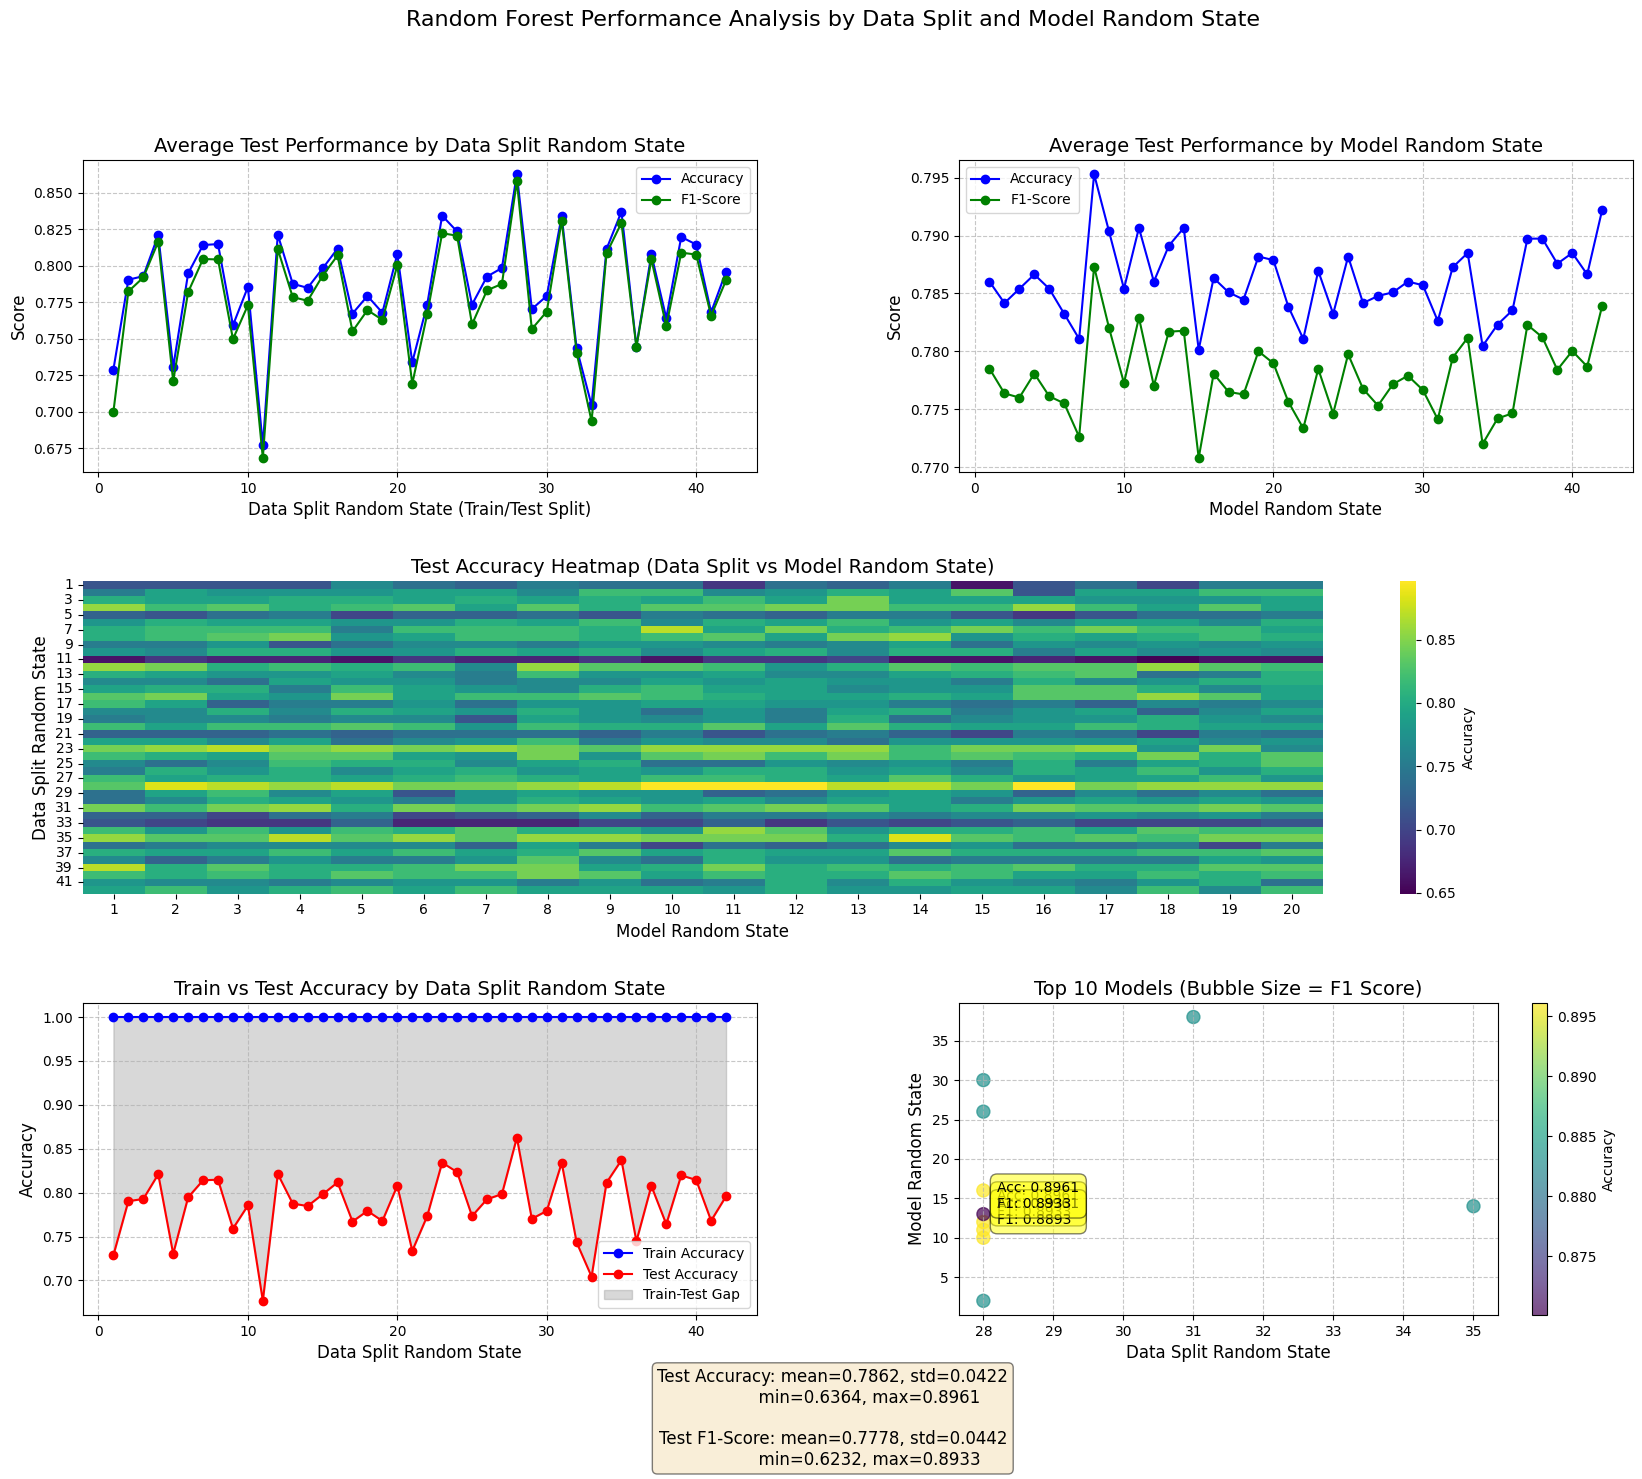


Classification Report (Best Model):
                    precision    recall  f1-score   support

                AD       0.89      0.62      0.73        13
Cognitive Negative       1.00      0.91      0.95        23
Cognitive Positive       0.95      0.95      0.95        20
               MCI       0.78      1.00      0.88        21

          accuracy                           0.90        77
         macro avg       0.90      0.87      0.88        77
      weighted avg       0.91      0.90      0.89        77


Confusion Matrix (Best Model):
[[ 8  0  0  5]
 [ 1 21  1  0]
 [ 0  0 19  1]
 [ 0  0  0 21]]

Feature Importance (Best Model):
        Feature  Importance
4   IgA Average    0.220418
6   IgM Average    0.203723
5   IgE Average    0.142021
2  IgG3 Average    0.117447
3  IgG4 Average    0.115413
1  IgG2 Average    0.100756
0  IgG1 Average    0.100223


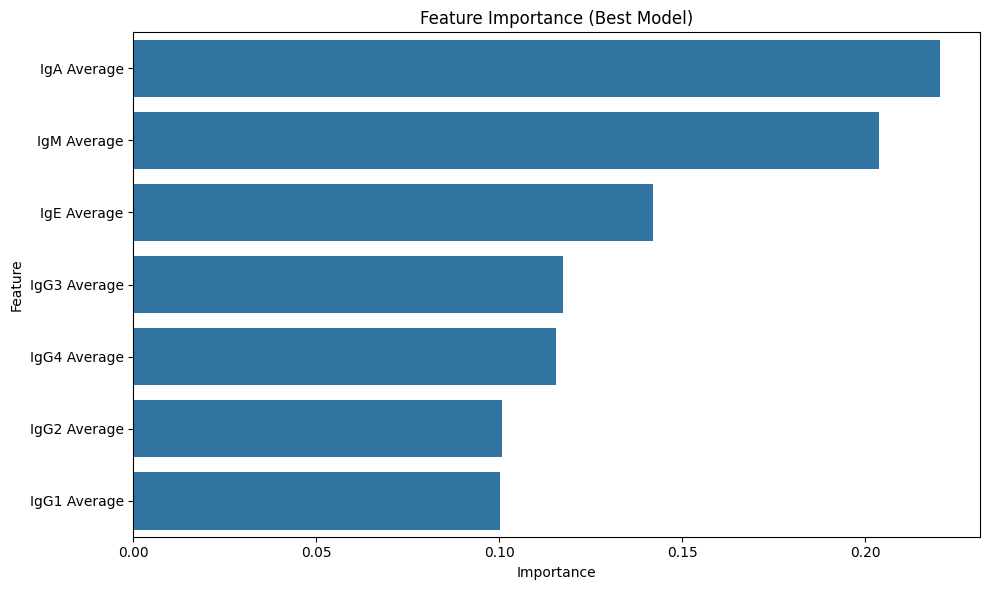

Cross-validation scores: [0.53846154 0.70588235 0.80392157 0.60784314 0.62745098]
Mean CV accuracy: 0.6567
Data saved to 'Best_Trained_Model_Pumpkin2025-03-21.pkl'

Analysis complete!


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import datetime
import google.colab.files as files

# Track all metrics with their parameters
results_df = pd.DataFrame(columns=['data_split_random_state', 'model_Random_State', 'Accuracy', 'F1_Score','Is_Train', 'Is_Test'])


uploadedSpreadsheet = files.upload()
fileName = list(uploadedSpreadsheet.keys())[0]
data = pd.read_excel(fileName)
columns_to_process = ['IgG1 Average', 'IgG2 Average', 'IgG3 Average', 'IgG4 Average', 'IgA Average','IgE Average','IgM Average']

def OutlierRemoval(data, columns, filter_data):
    if filter_data == False:
        print("\n --- Data has outliers and was not filtered ---")
        return data
    else:
        data_filtered = data.copy()
        for column in columns:
            Q1 = data_filtered[column].quantile(0.25)
            Q3 = data_filtered[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data_filtered = data_filtered[(data_filtered[column] >= lower_bound) &
                                        (data_filtered[column] <= upper_bound)]

        print("\n --- Data does not have outliers and was filtered ---")
        return data_filtered


def SaveData(Pumpkin, prefix=""):
    filename = f"{prefix}Trained_Model_Pumpkin{datetime.date.today()}.pkl"
    joblib.dump(Pumpkin, filename)
    return f"Data saved to '{filename}'"

def plot_rf_performance(results_df):
    """
    Create visualizations for Random Forest performance across iterations and random states.
    """
    # Set up the figure with subplots
    fig = plt.figure(figsize=(20, 15))
    grid = plt.GridSpec(3, 2, hspace=0.35, wspace=0.3)

    # 1. Performance by Iteration (top left)
    ax1 = fig.add_subplot(grid[0, 0])

    # Get test data only
    test_data = results_df[results_df['Is_Test'] == True]

    # Group by iteration and calculate mean metrics
    by_iteration = test_data.groupby('data_split_random_state').agg({
        'Accuracy': 'mean',
        'F1_Score': 'mean'
    }).reset_index()

    # Plot iteration performance
    ax1.plot(by_iteration['data_split_random_state'], by_iteration['Accuracy'], 'o-', color='blue', label='Accuracy')
    ax1.plot(by_iteration['data_split_random_state'], by_iteration['F1_Score'], 'o-', color='green', label='F1-Score')

    ax1.set_title('Average Test Performance by Data Split Random State', fontsize=14)
    ax1.set_xlabel('Data Split Random State (Train/Test Split)', fontsize=12)
    ax1.set_ylabel('Score', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()

    # 2. Performance by Random State (top right)
    ax2 = fig.add_subplot(grid[0, 1])

    # Group by random state and calculate mean metrics
    by_random_state = test_data.groupby('model_Random_State').agg({
        'Accuracy': 'mean',
        'F1_Score': 'mean'
    }).reset_index()

    # Plot random state performance
    ax2.plot(by_random_state['model_Random_State'], by_random_state['Accuracy'], 'o-', color='blue', label='Accuracy')
    ax2.plot(by_random_state['model_Random_State'], by_random_state['F1_Score'], 'o-', color='green', label='F1-Score')

    ax2.set_title('Average Test Performance by Model Random State', fontsize=14)
    ax2.set_xlabel('Model Random State', fontsize=12)
    ax2.set_ylabel('Score', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()

    # 3. Heatmap of Accuracy by Iteration and Random State (middle)
    ax3 = fig.add_subplot(grid[1, :])

    # Create a pivot table for the heatmap
    # Limit to first 20 random states for clarity if there are many
    heatmap_data = test_data[test_data['model_Random_State'] <= 20].pivot_table(
        index='data_split_random_state',
        columns='model_Random_State',
        values='Accuracy'
    )

    # Plot heatmap
    sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt='.3f',
                cbar_kws={'label': 'Accuracy'}, ax=ax3)

    ax3.set_title('Test Accuracy Heatmap (Data Split vs Model Random State)', fontsize=14)
    ax3.set_xlabel('Model Random State', fontsize=12)
    ax3.set_ylabel('Data Split Random State', fontsize=12)

    # 4. Train vs Test Performance (bottom left)
    ax4 = fig.add_subplot(grid[2, 0])

    # Prepare data for train vs test comparison
    train_data = results_df[results_df['Is_Train'] == True]
    train_mean = train_data.groupby('data_split_random_state')['Accuracy'].mean().reset_index()
    test_mean = test_data.groupby('data_split_random_state')['Accuracy'].mean().reset_index()

    # Calculate train-test gap
    merged_data = pd.merge(train_mean, test_mean, on='data_split_random_state', suffixes=('_train', '_test'))
    merged_data['gap'] = merged_data['Accuracy_train'] - merged_data['Accuracy_test']

    # Plot train vs test
    ax4.plot(merged_data['data_split_random_state'], merged_data['Accuracy_train'], 'o-', color='blue', label='Train Accuracy')
    ax4.plot(merged_data['data_split_random_state'], merged_data['Accuracy_test'], 'o-', color='red', label='Test Accuracy')

    # Add gap as a shaded region
    ax4.fill_between(merged_data['data_split_random_state'],
                   merged_data['Accuracy_test'],
                   merged_data['Accuracy_train'],
                   alpha=0.3, color='gray', label='Train-Test Gap')

    ax4.set_title('Train vs Test Accuracy by Data Split Random State', fontsize=14)
    ax4.set_xlabel('Data Split Random State', fontsize=12)
    ax4.set_ylabel('Accuracy', fontsize=12)
    ax4.grid(True, linestyle='--', alpha=0.7)
    ax4.legend()

    # 5. Best Models (bottom right)
    ax5 = fig.add_subplot(grid[2, 1])

    # Get top 10 models by test accuracy
    top_models = test_data.sort_values('Accuracy', ascending=False).head(10)

    # Create a scatter plot of the best models
    scatter = ax5.scatter(
        top_models['data_split_random_state'],
        top_models['model_Random_State'],
        c=top_models['Accuracy'],
        s=top_models['F1_Score']*100,  # Size based on F1 score
        cmap='viridis',
        alpha=0.7
    )

    # Add colorbar and legend
    cbar = plt.colorbar(scatter, ax=ax5)
    cbar.set_label('Accuracy')

    # Add annotations for the top 3 models
    for i in range(min(3, len(top_models))):
        row = top_models.iloc[i]
        ax5.annotate(
            f"Acc: {row['Accuracy']:.4f}\nF1: {row['F1_Score']:.4f}",
            (row['data_split_random_state'], row['model_Random_State']),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
        )

    ax5.set_title('Top 10 Models (Bubble Size = F1 Score)', fontsize=14)
    ax5.set_xlabel('Data Split Random State', fontsize=12)
    ax5.set_ylabel('Model Random State', fontsize=12)
    ax5.grid(True, linestyle='--', alpha=0.7)

    # Add overall summary statistics as text
    test_stats = test_data.agg({
        'Accuracy': ['mean', 'std', 'min', 'max'],
        'F1_Score': ['mean', 'std', 'min', 'max']
    }).round(4)

    stats_text = (
        f"Test Accuracy: mean={test_stats['Accuracy']['mean']}, std={test_stats['Accuracy']['std']}\n"
        f"              min={test_stats['Accuracy']['min']}, max={test_stats['Accuracy']['max']}\n\n"
        f"Test F1-Score: mean={test_stats['F1_Score']['mean']}, std={test_stats['F1_Score']['std']}\n"
        f"              min={test_stats['F1_Score']['min']}, max={test_stats['F1_Score']['max']}"
    )

    plt.figtext(0.5, 0.01, stats_text, ha='center', fontsize=12,
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Adjust layout and add main title
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.suptitle('Random Forest Performance Analysis by Data Split and Model Random State', fontsize=16)

    # Save the figure
    plt.savefig('rf_performance_analysis.png', dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()

    return fig



# Remove outliers
filter_data = True  # Set to True if you want to remove outliers
data = OutlierRemoval(data, columns_to_process, filter_data)
print("Data shape after outlier removal:", data.shape)

# Save to Excel file
output_file = "after_outlier.xlsx"
data.to_excel(output_file, index=False)
print(f"Data saved to '{output_file}'")

# Data Input for Model
feature_names = data[columns_to_process]
Group = data['Group']

# Perform multiple train/test splits and evaluate model on each
train_indexes = []
test_indexes = []
accuracies = []
f1_scores = []
models = []
best_models_per_iteration = []

print("\n--- Multiple Train-Test Split Evaluation ---")
num_iterations = 42    # Reduced for demonstration, use 100 for full analysis
num_random_states = 42  # Reduced for demonstration, use 99 for full analysis

# Global results tracking
results_df = pd.DataFrame(columns=[
    'data_split_random_state', 'model_Random_State', 'Accuracy', 'F1_Score',
    'Is_Train', 'Is_Test'
])

for i in range(1, num_iterations + 1):
    print(f"\nData Split Random State {i}/{num_iterations}")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        feature_names, Group, test_size=0.3, shuffle=True, random_state=i, stratify=Group
    )

    # Store indexes for potential later use
    train_indexes.append(X_train.index)
    test_indexes.append(X_test.index)

    # Track best model for this iteration
    best_acc_for_iteration = 0
    best_model_for_iteration = None
    best_random_state_for_iteration = None

    for p in range(1, num_random_states + 1):
        # Train Random Forest model
        Pumpkin = RandomForestClassifier(n_estimators=100, random_state=p, bootstrap=True)
        Pumpkin.fit(X_train, y_train)
        models.append(Pumpkin)

        # Test set predictions and metrics
        y_test_pred = Pumpkin.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_report = classification_report(y_test, y_test_pred, output_dict=True)
        test_f1 = test_report['weighted avg']['f1-score']

        # Training set predictions and metrics
        y_train_pred = Pumpkin.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_report = classification_report(y_train, y_train_pred, output_dict=True)
        train_f1 = train_report['weighted avg']['f1-score']

        # Track if this is the best model for this iteration
        if test_accuracy > best_acc_for_iteration:
            best_acc_for_iteration = test_accuracy
            best_model_for_iteration = Pumpkin
            best_random_state_for_iteration = p

        # Add test results to the DataFrame
        results_df = pd.concat([results_df, pd.DataFrame([{
            'data_split_random_state': i,
            'model_Random_State': p,
            'Accuracy': test_accuracy,
            'F1_Score': test_f1,
            'Is_Train': False,
            'Is_Test': True
        }])], ignore_index=True)

        # Add train results to the DataFrame
        results_df = pd.concat([results_df, pd.DataFrame([{
            'data_split_random_state': i,
            'model_Random_State': p,
            'Accuracy': train_accuracy,
            'F1_Score': train_f1,
            'Is_Train': True,
            'Is_Test': False
        }])], ignore_index=True)

        # Print every 5th model to reduce output
        if p % 5 == 0 or p == 1:
            print(f'Data Split Random State {i} model_Random_State: {p} Test Accuracy: {test_accuracy:.4f}')
            print(f"Test Weighted F1-score: {test_f1:.4f}")

    # Save the best model for this iteration
    best_models_per_iteration.append((i, best_random_state_for_iteration, best_acc_for_iteration, best_model_for_iteration))
    print(f"Best model for data split {i}: model_Random_State={best_random_state_for_iteration}, accuracy={best_acc_for_iteration:.4f}")

# Print overall performance statistics
print("\n--- Overall Performance Statistics ---")
test_only = results_df[results_df['Is_Test'] == True]
print(f"Mean Test Accuracy: {test_only['Accuracy'].mean():.4f}")
print(f"Standard Deviation: {test_only['Accuracy'].std():.4f}")
print(f"Min Accuracy: {test_only['Accuracy'].min():.4f}")
print(f"Max Accuracy: {test_only['Accuracy'].max():.4f}")

# Find overall best model
best_result = results_df[results_df['Is_Test'] == True].sort_values('Accuracy', ascending=False).iloc[0]
print(f"\nBest model overall: Data Split Random State {best_result['data_split_random_state']}, Model Random State {best_result['model_Random_State']}")
print(f"Accuracy: {best_result['Accuracy']:.4f}, F1-Score: {best_result['F1_Score']:.4f}")

# Plot the results
print("\nCreating performance visualization...")
plot_rf_performance(results_df)

# Select best model details
best_data_split = int(best_result['data_split_random_state'])
best_model_random_state = int(best_result['model_Random_State'])

# Find the best model's index
best_iter_idx = best_data_split - 1  # Convert to 0-based index
best_model_idx = (best_iter_idx * num_random_states) + (best_model_random_state - 1)
best_model = models[best_model_idx]

# Evaluate the best model more thoroughly
best_X_train_idx = train_indexes[best_iter_idx]
best_X_test_idx = test_indexes[best_iter_idx]
X_test_best = feature_names.loc[best_X_test_idx]
y_test_best = Group.loc[best_X_test_idx]
y_pred_best = best_model.predict(X_test_best)

# Print detailed classification report for the best model
print("\nClassification Report (Best Model):")
print(classification_report(y_test_best, y_pred_best))

# Print confusion matrix for the best model
print("\nConfusion Matrix (Best Model):")
print(confusion_matrix(y_test_best, y_pred_best))

# Feature importance for the best model
feature_importance = pd.DataFrame({
    'Feature': columns_to_process,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Best Model):")
print(feature_importance)

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Best Model)')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

# Implement k-fold cross-validation on best model
cv_scores = cross_val_score(best_model, feature_names, Group, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")

# Save the best model
save_result = SaveData(best_model, prefix="Best_")
print(save_result)

print("\nAnalysis complete!")